<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
C:\Users\pantu\AppData\Local\Temp\ipykernel_26028\1011181285.py:49: SyntaxWarning: invalid escape sequence '\m'
  dataset_mnist = torchvision.datasets.MNIST("datasets\mnist", download=True, train=True, transform=transforms)


Using device: cuda


Epoch [1/20], loss_mean=0.322: 100%|██████████| 1313/1313 [00:06<00:00, 190.99it/s]


loss_mean = 0.322, Q_val = 0.242


Epoch [2/20], loss_mean=0.241: 100%|██████████| 1313/1313 [00:07<00:00, 177.17it/s]


loss_mean = 0.241, Q_val = 0.209


Epoch [3/20], loss_mean=0.225: 100%|██████████| 1313/1313 [00:08<00:00, 162.69it/s]


loss_mean = 0.225, Q_val = 0.238


Epoch [4/20], loss_mean=0.224: 100%|██████████| 1313/1313 [00:08<00:00, 160.91it/s]


loss_mean = 0.224, Q_val = 0.247


Epoch [5/20], loss_mean=0.226: 100%|██████████| 1313/1313 [00:08<00:00, 147.40it/s]


loss_mean = 0.226, Q_val = 0.201


Epoch [6/20], loss_mean=0.222: 100%|██████████| 1313/1313 [00:08<00:00, 148.67it/s]


loss_mean = 0.222, Q_val = 0.355


Epoch [7/20], loss_mean=0.225: 100%|██████████| 1313/1313 [00:07<00:00, 173.60it/s]


loss_mean = 0.225, Q_val = 0.205


Epoch [8/20], loss_mean=0.225: 100%|██████████| 1313/1313 [00:08<00:00, 148.81it/s]


loss_mean = 0.225, Q_val = 0.222


Epoch [9/20], loss_mean=0.222: 100%|██████████| 1313/1313 [00:08<00:00, 150.24it/s]


loss_mean = 0.222, Q_val = 0.194


Epoch [10/20], loss_mean=0.219: 100%|██████████| 1313/1313 [00:08<00:00, 149.04it/s]


loss_mean = 0.219, Q_val = 0.227


Epoch [11/20], loss_mean=0.220: 100%|██████████| 1313/1313 [00:08<00:00, 147.71it/s]


loss_mean = 0.220, Q_val = 0.289


Epoch [12/20], loss_mean=0.217: 100%|██████████| 1313/1313 [00:08<00:00, 148.22it/s]


loss_mean = 0.217, Q_val = 0.273


Epoch [13/20], loss_mean=0.221: 100%|██████████| 1313/1313 [00:08<00:00, 147.15it/s]


loss_mean = 0.221, Q_val = 0.245


Epoch [14/20], loss_mean=0.216: 100%|██████████| 1313/1313 [00:08<00:00, 146.98it/s]


loss_mean = 0.216, Q_val = 0.246


Epoch [15/20], loss_mean=0.216: 100%|██████████| 1313/1313 [00:08<00:00, 148.43it/s]


loss_mean = 0.216, Q_val = 0.209


Epoch [16/20], loss_mean=0.219: 100%|██████████| 1313/1313 [00:08<00:00, 148.34it/s]


loss_mean = 0.219, Q_val = 0.216


Epoch [17/20], loss_mean=0.214: 100%|██████████| 1313/1313 [00:08<00:00, 148.27it/s]


loss_mean = 0.214, Q_val = 0.227


Epoch [18/20], loss_mean=0.219: 100%|██████████| 1313/1313 [00:08<00:00, 153.43it/s]


loss_mean = 0.219, Q_val = 0.220


Epoch [19/20], loss_mean=0.217: 100%|██████████| 1313/1313 [00:08<00:00, 153.32it/s]


loss_mean = 0.217, Q_val = 0.204


Epoch [20/20], loss_mean=0.218: 100%|██████████| 1313/1313 [00:07<00:00, 172.05it/s]


loss_mean = 0.218, Q_val = 0.300


100%|██████████| 20/20 [00:02<00:00,  6.99it/s]


Test Accuracy: 0.9138


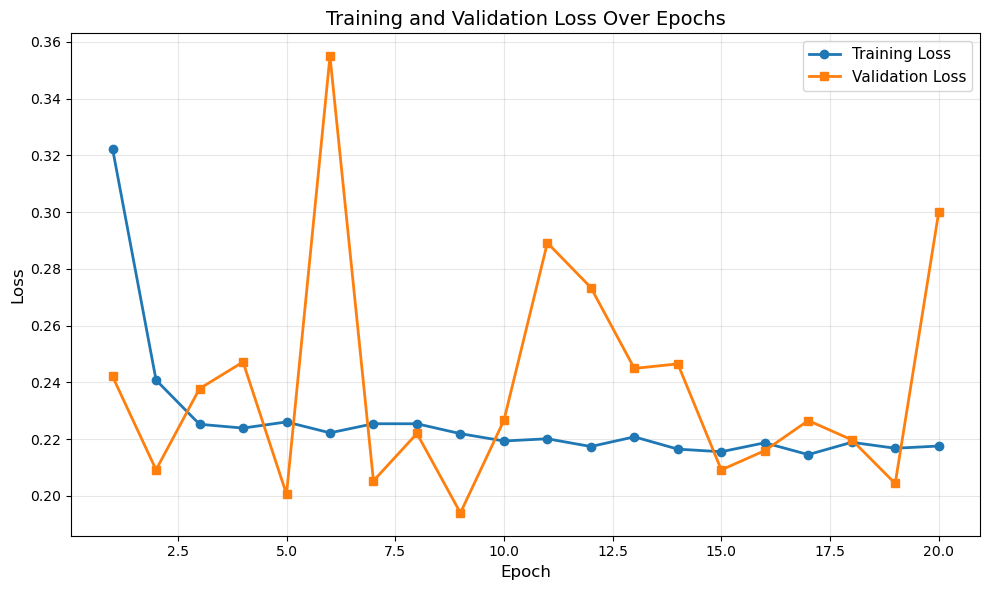


Final Results:
Training Loss: 0.2175
Validation Loss: 0.3000
Test Accuracy: 0.9138


In [ ]:
# MNIST save model p4 (with regularization)
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import torch
import torch.utils.data as data
import json
from PIL import Image
import torchvision.transforms.v2 as tfs
import torchvision
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# GPU setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


class RavelTransform(nn.Module):
    def forward(self,item):
        return item.ravel()


class DigitNN(nn.Module):
    def __init__(self, input_dim, num_hid, out_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim,num_hid)
        self.layer2 = nn.Linear(num_hid, out_dim)
        self.dropout_1 = nn.Dropout1d(0.3) # Dropout

    def forward(self,x):
        x = self.layer1(x)
        x = nn.functional.relu(x)
        x = self.dropout_1(x)
        x = self.layer2(x)
        return x

model = DigitNN(28 * 28, 32, 10).to(device)  # Move model to GPU


# Setting trnsform
transforms = tfs.Compose([tfs.ToImage(),
                          tfs.Grayscale(), 
                          tfs.ToDtype(torch.float32, scale=True), # converting to float
                          RavelTransform() # or tfs.Lambda(lambda _im: _im.ravel()),
                          ])


dataset_mnist = torchvision.datasets.MNIST("datasets\mnist", download=True, train=True, transform=transforms)
d_train, d_val = data.random_split(dataset_mnist , [0.7, 0.3])
train_data = data.DataLoader(d_train, batch_size=32, shuffle=True)
train_data_val = data.DataLoader(d_val, batch_size=32, shuffle=False)

# optimizer = optim.Adam(params=model.parameters(), lr=0.01, weight_decay=0.001)
optimizer = optim.Adam(params=model.parameters(), lr=0.01, weight_decay=0.001)
loss_function = nn.CrossEntropyLoss()

# Lists to store metrics for plotting
train_losses = []
val_losses = []

ep = 20
for _e in range(ep):
    model.train()
    loss_mean = 0
    loss_count = 0
    
    train_data_tqdm = tqdm(train_data, leave=True)
    for x_train_img, y_target in train_data_tqdm:
        # Move data to GPU
        x_train_img, y_target = x_train_img.to(device), y_target.to(device)
        
        predict = model(x_train_img)
        loss = loss_function(predict, y_target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_count +=1
        loss_mean = 1/loss_count * loss.item() + (1 - 1/loss_count) * loss_mean
        train_data_tqdm.set_description(f"Epoch [{_e+1}/{ep}], loss_mean={loss_mean:.3f}")

    train_losses.append(loss_mean)

    # Validataion
    model.eval()
    Q_val = 0
    count_val = 0

    with torch.no_grad():  # No gradients needed for validation
        for x_val_img , y_target_val in train_data_val:
            # Move data to GPU
            x_val_img, y_target_val = x_val_img.to(device), y_target_val.to(device)
            
            p = model(x_val_img)
            loss = loss_function(p,y_target_val)
            Q_val+= loss.item()
            count_val +=1
    Q_val /= count_val
    val_losses.append(Q_val)

    print(f"loss_mean = {loss_mean:.3f}, Q_val = {Q_val:.3f}")


# Test
d_test = ImageFolder("datasets/MNIST/test", transform=transforms)
test_data = data.DataLoader(d_test , batch_size=500, shuffle=False)
Q = 0

model.eval()

test_tqdm = tqdm(test_data, leave=True)
with torch.no_grad():  # No gradients needed for testing
    for x_test, y_test in test_tqdm:
        # Move data to GPU
        x_test, y_test = x_test.to(device), y_test.to(device)
        
        p = model(x_test) # 500, 10
        p = torch.argmax(p, dim=1) # 500,1
        Q += torch.sum(p == y_test).item()

Q /= len(d_test)
print(f"Test Accuracy: {Q:.4f}")


# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, ep+1), train_losses, marker='o', label='Training Loss', linewidth=2)
plt.plot(range(1, ep+1), val_losses, marker='s', label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss Over Epochs', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_validation_loss.png', dpi=150)
plt.show()

print(f"\nFinal Results:")
print(f"Training Loss: {train_losses[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}")
print(f"Test Accuracy: {Q:.4f}")

<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\m'
C:\Users\pantu\AppData\Local\Temp\ipykernel_26028\1834302726.py:51: SyntaxWarning: invalid escape sequence '\m'
  dataset_mnist = torchvision.datasets.MNIST("datasets\mnist", download=True, train=True, transform=transforms)


Using device: cuda


Epoch [1/20], loss_mean=0.937: 100%|██████████| 1313/1313 [00:08<00:00, 160.50it/s]


loss_mean = 0.937, Q_val = 0.288


Epoch [2/20], loss_mean=0.854: 100%|██████████| 1313/1313 [00:07<00:00, 177.16it/s]


loss_mean = 0.854, Q_val = 0.257


Epoch [3/20], loss_mean=0.832: 100%|██████████| 1313/1313 [00:07<00:00, 171.82it/s]


loss_mean = 0.832, Q_val = 0.202


Epoch [4/20], loss_mean=0.828: 100%|██████████| 1313/1313 [00:07<00:00, 170.97it/s]


loss_mean = 0.828, Q_val = 0.223


Epoch [5/20], loss_mean=0.825: 100%|██████████| 1313/1313 [00:09<00:00, 144.89it/s]


loss_mean = 0.825, Q_val = 0.211


Epoch [6/20], loss_mean=0.819: 100%|██████████| 1313/1313 [00:09<00:00, 142.63it/s]


loss_mean = 0.819, Q_val = 0.252


Epoch [7/20], loss_mean=0.814: 100%|██████████| 1313/1313 [00:07<00:00, 173.45it/s]


loss_mean = 0.814, Q_val = 0.214


Epoch [8/20], loss_mean=0.808: 100%|██████████| 1313/1313 [00:08<00:00, 159.15it/s]


loss_mean = 0.808, Q_val = 0.203


Epoch [9/20], loss_mean=0.807: 100%|██████████| 1313/1313 [00:09<00:00, 142.50it/s]


loss_mean = 0.807, Q_val = 0.244


Epoch [10/20], loss_mean=0.814: 100%|██████████| 1313/1313 [00:09<00:00, 142.51it/s]


loss_mean = 0.814, Q_val = 0.212


Epoch [11/20], loss_mean=0.803: 100%|██████████| 1313/1313 [00:09<00:00, 142.77it/s]


loss_mean = 0.803, Q_val = 0.236


Epoch [12/20], loss_mean=0.813: 100%|██████████| 1313/1313 [00:09<00:00, 141.49it/s]


loss_mean = 0.813, Q_val = 0.222


Epoch [13/20], loss_mean=0.795: 100%|██████████| 1313/1313 [00:09<00:00, 142.69it/s]


loss_mean = 0.795, Q_val = 0.227


Epoch [14/20], loss_mean=0.802: 100%|██████████| 1313/1313 [00:09<00:00, 142.35it/s]


loss_mean = 0.802, Q_val = 0.219


Epoch [15/20], loss_mean=0.796: 100%|██████████| 1313/1313 [00:09<00:00, 141.75it/s]


loss_mean = 0.796, Q_val = 0.222


Epoch [16/20], loss_mean=0.783: 100%|██████████| 1313/1313 [00:08<00:00, 147.89it/s]


loss_mean = 0.783, Q_val = 0.256


Epoch [17/20], loss_mean=0.795: 100%|██████████| 1313/1313 [00:08<00:00, 157.31it/s]


loss_mean = 0.795, Q_val = 0.269


Epoch [18/20], loss_mean=0.794: 100%|██████████| 1313/1313 [00:08<00:00, 149.48it/s]


loss_mean = 0.794, Q_val = 0.243


Epoch [19/20], loss_mean=0.796: 100%|██████████| 1313/1313 [00:09<00:00, 145.03it/s]


loss_mean = 0.796, Q_val = 0.230


Epoch [20/20], loss_mean=0.782: 100%|██████████| 1313/1313 [00:07<00:00, 171.47it/s]


loss_mean = 0.782, Q_val = 0.226


100%|██████████| 20/20 [00:02<00:00,  7.27it/s]


Test Accuracy: 0.9522


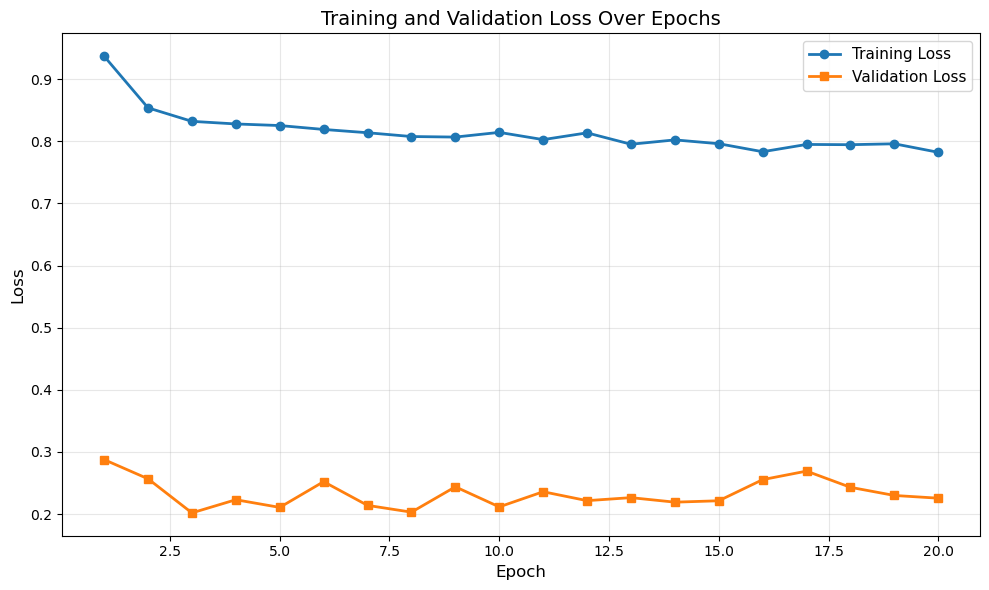


Final Results:
Training Loss: 0.7822
Validation Loss: 0.2257
Test Accuracy: 0.9522


In [4]:
# MNIST save model p4 ( with dropout)
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import torch
import torch.utils.data as data
import json
from PIL import Image
import torchvision.transforms.v2 as tfs
import torchvision
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# GPU setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


class RavelTransform(nn.Module):
    def forward(self,item):
        return item.ravel()


class DigitNN(nn.Module):
    def __init__(self, input_dim, num_hid, out_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim,num_hid)
        self.layer2 = nn.Linear(num_hid, out_dim)
        self.dropout_1 = nn.Dropout1d(0.3) # Dropout

    def forward(self,x):
        x = self.layer1(x)
        x = nn.functional.relu(x)
        x = self.dropout_1(x)
        x = self.layer2(x)
        return x

model = DigitNN(28 * 28, 32, 10).to(device)  # Move model to GPU


# Setting trnsform
transforms = tfs.Compose([tfs.ToImage(),
                          tfs.Grayscale(), 
                          tfs.ToDtype(torch.float32, scale=True), # converting to float
                          RavelTransform() # or tfs.Lambda(lambda _im: _im.ravel()),
                          ])


dataset_mnist = torchvision.datasets.MNIST("datasets\mnist", download=True, train=True, transform=transforms)
d_train, d_val = data.random_split(dataset_mnist , [0.7, 0.3])
train_data = data.DataLoader(d_train, batch_size=32, shuffle=True)
train_data_val = data.DataLoader(d_val, batch_size=32, shuffle=False)

optimizer = optim.Adam(params=model.parameters(), lr=0.01)
loss_function = nn.CrossEntropyLoss()

# Lists to store metrics for plotting
train_losses = []
val_losses = []

ep = 20
for _e in range(ep):
    model.train()
    loss_mean = 0
    loss_count = 0
    
    train_data_tqdm = tqdm(train_data, leave=True)
    for x_train_img, y_target in train_data_tqdm:
        # Move data to GPU
        x_train_img, y_target = x_train_img.to(device), y_target.to(device)
        
        predict = model(x_train_img)
        loss = loss_function(predict, y_target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_count +=1
        loss_mean = 1/loss_count * loss.item() + (1 - 1/loss_count) * loss_mean
        train_data_tqdm.set_description(f"Epoch [{_e+1}/{ep}], loss_mean={loss_mean:.3f}")

    train_losses.append(loss_mean)

    # Validataion
    model.eval()
    Q_val = 0
    count_val = 0

    with torch.no_grad():  # No gradients needed for validation
        for x_val_img , y_target_val in train_data_val:
            # Move data to GPU
            x_val_img, y_target_val = x_val_img.to(device), y_target_val.to(device)
            
            p = model(x_val_img)
            loss = loss_function(p,y_target_val)
            Q_val+= loss.item()
            count_val +=1
    Q_val /= count_val
    val_losses.append(Q_val)

    print(f"loss_mean = {loss_mean:.3f}, Q_val = {Q_val:.3f}")


# Test
d_test = ImageFolder("datasets/MNIST/test", transform=transforms)
test_data = data.DataLoader(d_test , batch_size=500, shuffle=False)
Q = 0

model.eval()

test_tqdm = tqdm(test_data, leave=True)
with torch.no_grad():  # No gradients needed for testing
    for x_test, y_test in test_tqdm:
        # Move data to GPU
        x_test, y_test = x_test.to(device), y_test.to(device)
        
        p = model(x_test) # 500, 10
        p = torch.argmax(p, dim=1) # 500,1
        Q += torch.sum(p == y_test).item()

Q /= len(d_test)
print(f"Test Accuracy: {Q:.4f}")


# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, ep+1), train_losses, marker='o', label='Training Loss', linewidth=2)
plt.plot(range(1, ep+1), val_losses, marker='s', label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss Over Epochs', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_validation_loss.png', dpi=150)
plt.show()

print(f"\nFinal Results:")
print(f"Training Loss: {train_losses[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}")
print(f"Test Accuracy: {Q:.4f}")